In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
adm_data=pd.read_excel('pre_processed_data.xlsx')

In [7]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application Major                    11929 non-null  int64  
 1   Scholarship_Awarded                  11929 non-null  int64  
 2   Application CGPA                     11929 non-null  float64
 3   FAFSA Filed                          11929 non-null  int64  
 4   Financial Aid Appeal                 11929 non-null  int64  
 5   Accepted Student Day Event Attended  11929 non-null  int64  
 6   Campus Visits - Person               11929 non-null  int64  
 7   Campus Visits - App                  11929 non-null  int64  
 8   Logins Before Admit                  11929 non-null  int64  
 9   Acceptance Call Success              11929 non-null  int64  
 10  Application Consider Test Scores     11929 non-null  int64  
 11  Application ACRK            

### univariate Analysis


### Application Major

In [8]:
adm_data['Application Major'].value_counts()

Application Major
54     1038
101     822
5       609
13      483
32      483
       ... 
100       1
19        1
87        1
86        1
18        1
Name: count, Length: 102, dtype: int64

In [9]:
adm_data['Application Major'].isnull().sum()

0

as we encoded them to integers for embedding layer which is a first layer for the neural network where each category is a array of numbers which are unique

### Application CGPA

In [10]:
#as we apply embeddings to application major there's nothing to do with the application major
adm_data['Application CGPA'].describe()

count    11929.000000
mean         3.506240
std          0.441297
min          0.000000
25%          3.200000
50%          3.600000
75%          3.900000
max          4.000000
Name: Application CGPA, dtype: float64

*Percentile meaning: how many of the values are less than the given percentile.**Not percentage**
25 percentile values is Q1 which is qualifier one in terms of box plot(where 25% includes the persons less than 3.2)

<Axes: ylabel='Frequency'>

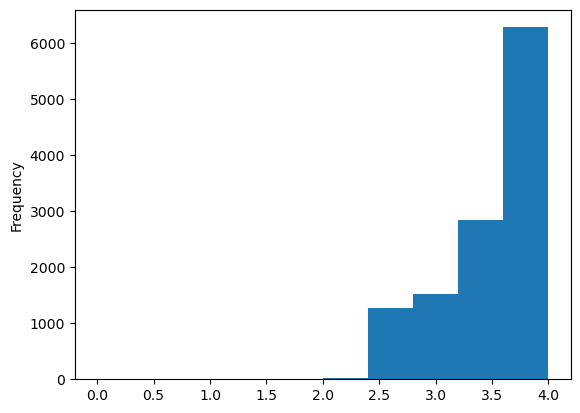

In [11]:
adm_data['Application CGPA'].plot(kind='hist')

<Axes: ylabel='Density'>

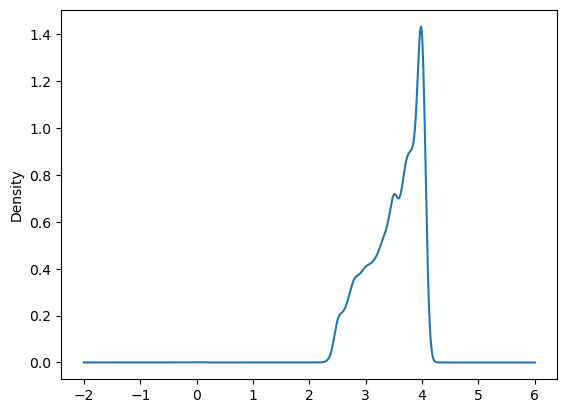

In [12]:
#kernel density estimate 
adm_data['Application CGPA'].plot(kind='kde')

In [13]:
adm_data['Application CGPA'].skew()

-0.7173565747532306

#### conclusions for CGPA
Skewness: skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.
1. CGPA is negatively skewed , the probability distribution curve is to the left and in the case of skeness the mean mode and median are not equal
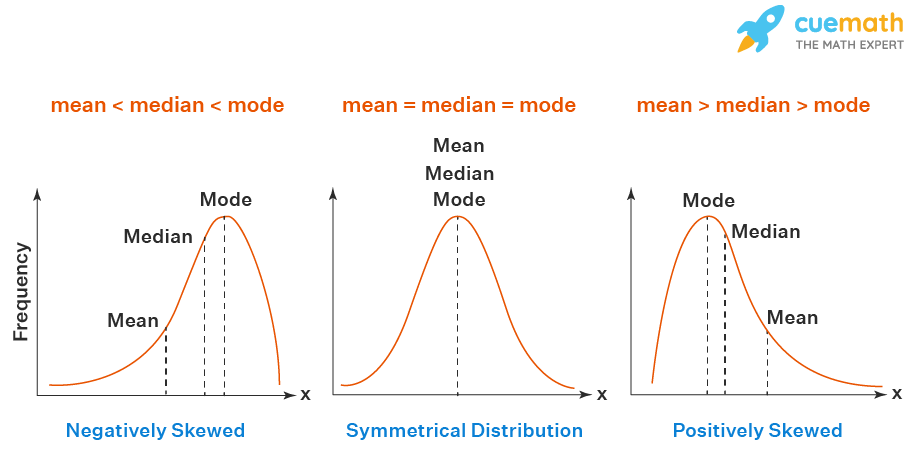
2. for a uniform dataset the mean mode and median are equal ex:3,3,3,3,3 mean =3 median is 3 and mode is 3 which is a uniformly distributed 

In [14]:
#need to fill this value with mean or mode imputation
adm_data['Application CGPA'].isnull().sum()

0

### Scholarship_awarded

In [15]:
adm_data['Scholarship_Awarded'].value_counts()

Scholarship_Awarded
1    11923
0        6
Name: count, dtype: int64

<Axes: xlabel='Scholarship_Awarded'>

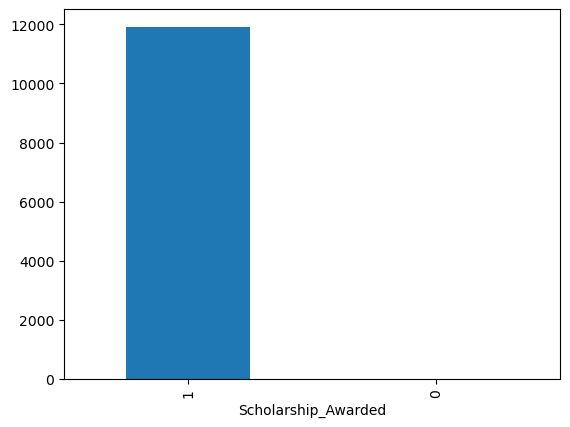

In [16]:
adm_data['Scholarship_Awarded'].value_counts().plot(kind='bar')

In [17]:
adm_data['Scholarship_Awarded'].isnull().sum()

0

### FAFSA filed and Financial Aid Appeal

In [18]:

adm_data['FAFSA Filed'].value_counts()

FAFSA Filed
1    8544
0    3385
Name: count, dtype: int64

In [19]:
adm_data['Financial Aid Appeal'].value_counts()

Financial Aid Appeal
0    11521
1      408
Name: count, dtype: int64

<Axes: xlabel='FAFSA Filed'>

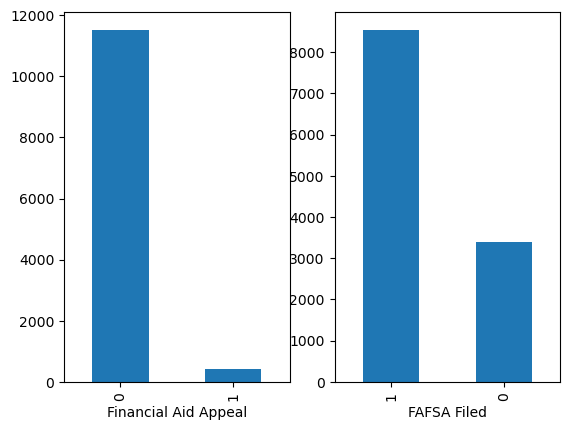

In [20]:
plt.subplot(121)
adm_data['Financial Aid Appeal'].value_counts().plot(kind='bar')
plt.subplot(122)
adm_data['FAFSA Filed'].value_counts().plot(kind='bar')

### Application ACRK

In [21]:
adm_data['Application ACRK'].describe()

count    11929.000000
mean         4.009809
std          1.978545
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Application ACRK, dtype: float64

25 % of the students whose ACRK less than 2

<Axes: ylabel='Density'>

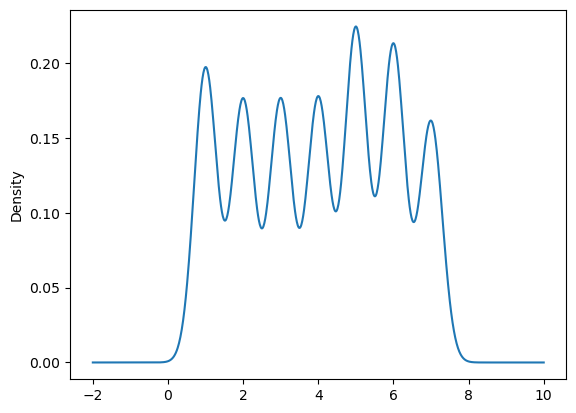

In [22]:
adm_data['Application ACRK'].plot(kind='kde')

In [23]:
adm_data['Application ACRK'].skew()

-0.07655099561830941

barely skewed almost normal distribution 

### Email sent and opened

In [24]:
adm_data['Emails Opened'].describe()

count    11929.000000
mean        15.698382
std         12.915803
min          0.000000
25%          6.000000
50%         13.000000
75%         23.000000
max        175.000000
Name: Emails Opened, dtype: float64

<Axes: ylabel='Frequency'>

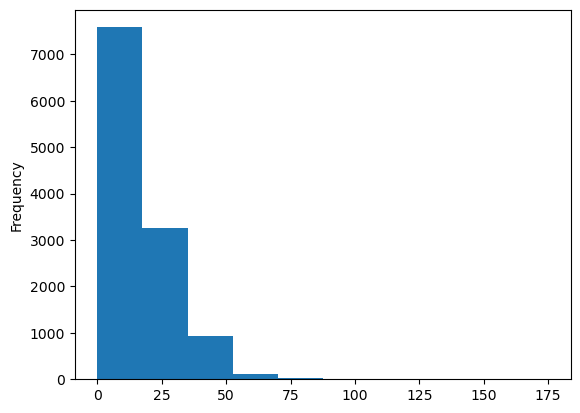

In [25]:
adm_data['Emails Opened'].plot(kind='hist')

In [26]:
adm_data['Emails Opened'].skew()
#data is positively skewed 

1.4398792572986845

<Axes: >

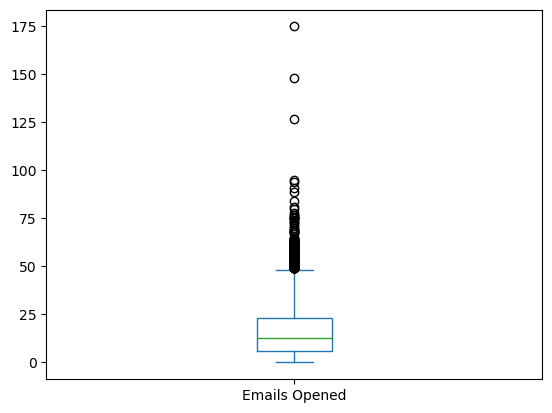

In [27]:
adm_data['Emails Opened'].plot(kind='box')

there are three outliers 175 ,near to 150 and 125

In [28]:
adm_data['Emails Sent'].describe()

count    11929.000000
mean        30.777265
std         19.252686
min          0.000000
25%         17.000000
50%         29.000000
75%         42.000000
max        230.000000
Name: Emails Sent, dtype: float64

In [29]:
adm_data['Emails Sent'].skew()

0.9362921907020534

<Axes: ylabel='Frequency'>

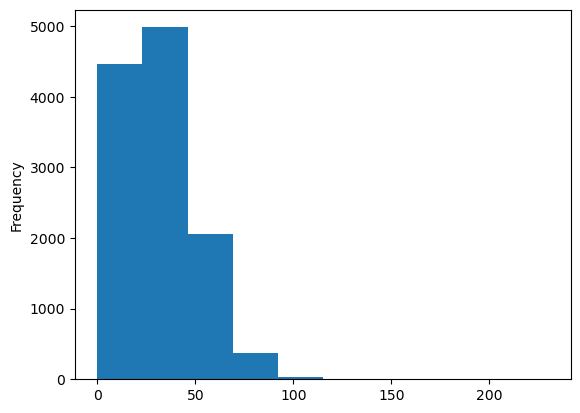

In [30]:
adm_data['Emails Sent'].plot(kind='hist')

<Axes: >

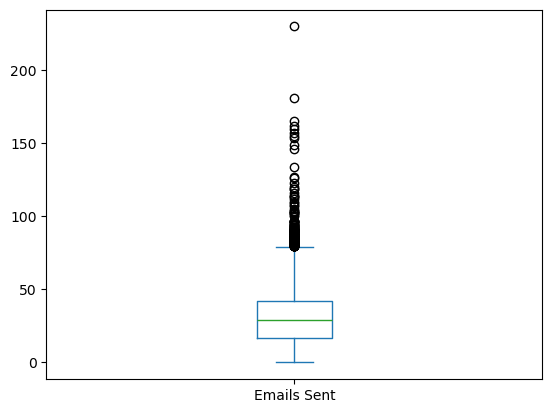

In [31]:
adm_data['Emails Sent'].plot(kind='box')

one outlier 

### Application span and admission span


In [32]:
adm_data['Application Span'].describe()

count    11929.000000
mean        16.736441
std         20.598253
min          0.000000
25%          4.000000
50%         12.000000
75%         21.000000
max        296.000000
Name: Application Span, dtype: float64

<Axes: ylabel='Frequency'>

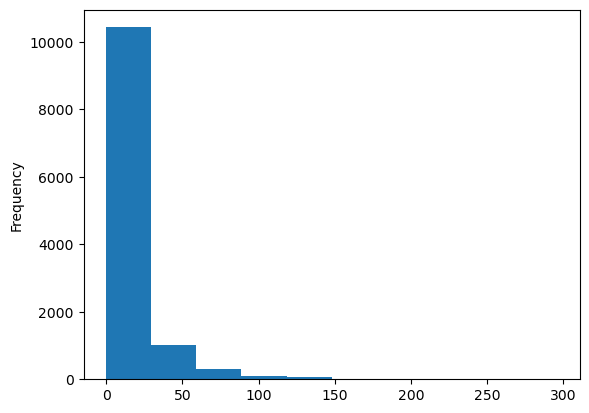

In [33]:
adm_data['Application Span'].plot(kind='hist')

<Axes: >

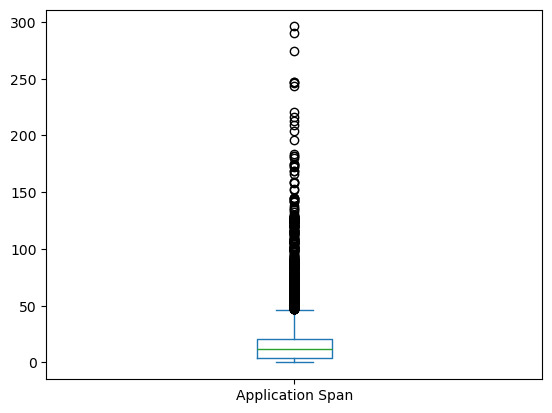

In [34]:
adm_data['Application Span'].plot(kind='box')

There is one outlier -202 try to drop the entry

In [35]:
adm_data[adm_data['Application Span']==-202]

,Application Major,Scholarship_Awarded,Application CGPA,FAFSA Filed,Financial Aid Appeal,Accepted Student Day Event Attended,Campus Visits - Person,Campus Visits - App,Logins Before Admit,Acceptance Call Success,...,Person Sex_Unknown,admitted,Application Span,High School Region_Midwest,High School Region_Northeast,High School Region_South,High School Region_Southwest,High School Region_West,High School Region_nan,Admission Span


In [36]:
adm_data['Admission Span'].describe()

count    11929.000000
mean         8.549954
std         27.692674
min          0.000000
25%          0.000000
50%          0.656701
75%          1.379792
max        321.905174
Name: Admission Span, dtype: float64

<Axes: >

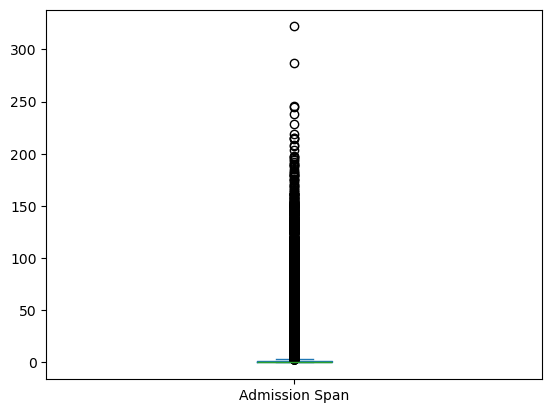

In [37]:
adm_data['Admission Span'].plot(kind='box')

In [38]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application Major                    11929 non-null  int64  
 1   Scholarship_Awarded                  11929 non-null  int64  
 2   Application CGPA                     11929 non-null  float64
 3   FAFSA Filed                          11929 non-null  int64  
 4   Financial Aid Appeal                 11929 non-null  int64  
 5   Accepted Student Day Event Attended  11929 non-null  int64  
 6   Campus Visits - Person               11929 non-null  int64  
 7   Campus Visits - App                  11929 non-null  int64  
 8   Logins Before Admit                  11929 non-null  int64  
 9   Acceptance Call Success              11929 non-null  int64  
 10  Application Consider Test Scores     11929 non-null  int64  
 11  Application ACRK            

### bi-variate analysis
1. Application CGPA ,Major vs admitted 
2. Scholarship_Awarded vs admitted
3. Person Sex_F and Person Sex_M vs admitted 
4. Application ACRK vs admitted

In [39]:
pd.crosstab(adm_data['admitted'],adm_data['Application CGPA'])

Application CGPA,0.000,2.300,2.400,2.430,2.500,2.510,2.520,2.530,2.540,2.550,...,3.920,3.921,3.930,3.940,3.950,3.960,3.970,3.980,3.990,4.000
admitted,,,,,,,,,,,,,,,,,,,,,
0,1,2,10,0,212,2,3,3,2,5,...,11,1,11,10,30,13,12,16,15,2119
1,1,0,14,1,49,0,1,1,2,0,...,2,0,1,2,2,3,4,5,0,257


In [40]:
pd.crosstab(adm_data['admitted'],adm_data['Application Major'])

Application Major,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
admitted,,,,,,,,,,,,,,,,,,,,,
0,242,27,58,148,83,570,40,1,13,36,...,107,313,355,71,3,236,60,85,0,778
1,15,3,6,12,6,39,4,1,1,1,...,5,80,26,2,5,32,6,18,1,44


In [41]:
pd.crosstab(adm_data['admitted'],adm_data['Scholarship_Awarded'])

Scholarship_Awarded,0,1
admitted,,
0,2,10469
1,4,1454


In [42]:
#Person Sex_F and Person Sex_M vs admitted 
pd.crosstab(adm_data['admitted'],adm_data['Person Sex_M'])

Person Sex_M,0,1
admitted,,
0,6829,3642
1,957,501


In [43]:
#Person Sex_F and Person Sex_M vs admitted 
pd.crosstab(adm_data['admitted'],adm_data['Person Sex_F'])

Person Sex_F,0,1
admitted,,
0,3648,6823
1,502,956


In [44]:
#Application ACRK vs admitted
pd.crosstab(adm_data['admitted'],adm_data['Application ACRK'])

Application ACRK,1.000000,2.000000,3.000000,4.000000,4.009557,5.000000,6.000000,7.000000
admitted,,,,,,,,
0,1502,1387,1404,1395,0,1801,1684,1298
1,277,197,182,199,1,215,231,156


In [45]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application Major                    11929 non-null  int64  
 1   Scholarship_Awarded                  11929 non-null  int64  
 2   Application CGPA                     11929 non-null  float64
 3   FAFSA Filed                          11929 non-null  int64  
 4   Financial Aid Appeal                 11929 non-null  int64  
 5   Accepted Student Day Event Attended  11929 non-null  int64  
 6   Campus Visits - Person               11929 non-null  int64  
 7   Campus Visits - App                  11929 non-null  int64  
 8   Logins Before Admit                  11929 non-null  int64  
 9   Acceptance Call Success              11929 non-null  int64  
 10  Application Consider Test Scores     11929 non-null  int64  
 11  Application ACRK            